In [14]:
"""
Plotta_data.py

Syfte:
    Kör en agentbaserad SIR-modell för mässling vid olika vaccinationsgrader och visar hur populationen utvecklas över tid.

Input:
    Inga externa inputs via parametrar. Modellparametrar anges direkt i filen:
        - N: antal agenter
        - width, height: area
        - initial_infected: antal infekterade vid start
        - vaccination_rate: vaccinationsgrad
        - mortality_rate: dödlighet
        - timesteps: antal tidssteg 

Output:
    - Grafer över S, I, R och D
    - Plottar Re (effektivt reproduktionstal)
    - Utskrift av resultat för varje simulering
"""

import importlib
import Agenter
import Modell

importlib.reload(Modell)
importlib.reload(Agenter)

import matplotlib.pyplot as plt
import numpy as np

In [21]:
#Modellparametrar
N = 1000
width = 14
height = 7
initial_infected = 1
mortality_rate = 0.0021
timesteps = 100

## Vaccination rate: 50% (Lägre än IDAHO)

In [29]:
#Vaccinationsgrad 50%
vaccination_rate = 0.5

num_runs = 10 # antal körningar 

S_runs = [] 
I_runs = [] 
R_runs = [] 
D_runs = [] 
Re_runs = [] 
new_inf_runs = []
total_new_inf_runs = []

for run in range(num_runs):
 
    model = Modell.SIRModel(N, width, height, initial_infected, vaccination_rate, mortality_rate)

    S_history = []
    I_history = []
    R_history = []
    D_history = []

    for t in range(timesteps):
        model.step()
        S_history.append(model.count_status("S"))
        I_history.append(model.count_status("I"))
        R_history.append(model.count_status("R"))
        D_history.append(model.count_status("D"))
        new_inf_runs.append(model_df["New Infected"].values)
        total_new_inf_runs.append(model_df["Total New Infected"].values)

    model_df = model.datacollector.get_model_vars_dataframe()
    
    Re_runs.append(model_df["Re"].values) 

    S_runs.append(S_history)
    I_runs.append(I_history)
    R_runs.append(R_history)
    D_runs.append(D_history)

S_arr = np.array(S_runs)
I_arr = np.array(I_runs)
R_arr = np.array(R_runs)
D_arr = np.array(D_runs)
Re_arr = np.array(Re_runs) 
new_inf_runs_arr = np.array(new_inf_runs)
total_new_inf_runs_arr = np.array(total_new_inf_runs)

S_mean, S_std = np.mean(S_arr, axis=0), np.std(S_arr, axis=0)
I_mean, I_std = np.mean(I_arr, axis=0), np.std(I_arr, axis=0)
R_mean, R_std = np.mean(R_arr, axis=0), np.std(R_arr, axis=0)
D_mean, D_std = np.mean(D_arr, axis=0), np.std(D_arr, axis=0)
Re_mean, Re_std = np.mean(Re_arr, axis=0), np.std(Re_arr, axis=0)
mean_new = new_inf_runs_arr.mean(axis=0)
std_new = new_inf_runs_arr.std(axis=0)
mean_total = total_new_inf_runs_arr.mean(axis=0)
std_total = total_new_inf_runs_arr.std(axis=0)



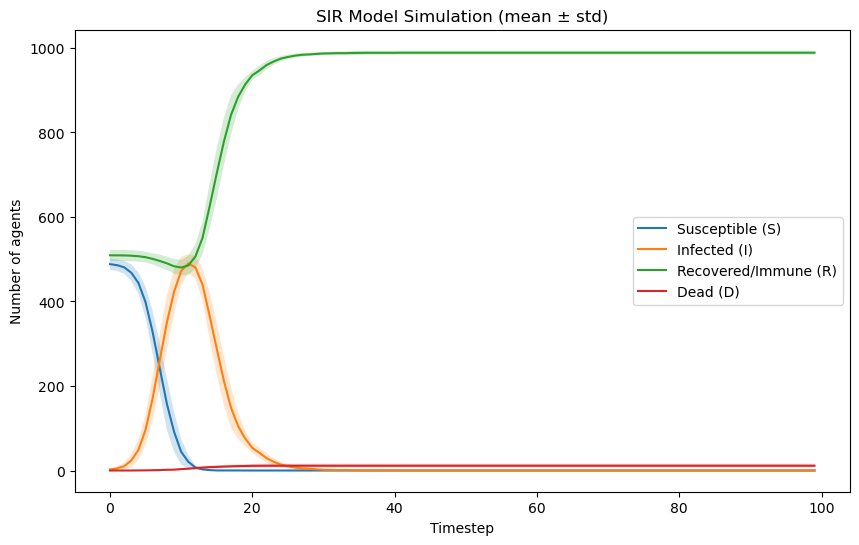

In [30]:
timesteps_range = np.arange(timesteps)

plt.figure(figsize=(10,6))
plt.plot(S_mean, label="Susceptible (S)")
plt.fill_between(timesteps_range, S_mean - S_std, S_mean + S_std, alpha=0.2)

plt.plot(I_mean, label="Infected (I)")
plt.fill_between(timesteps_range, I_mean - I_std, I_mean + I_std, alpha=0.2)

plt.plot(R_mean, label="Recovered/Immune (R)")
plt.fill_between(timesteps_range, R_mean - R_std, R_mean + R_std, alpha=0.2)

plt.plot(D_mean, label="Dead (D)")
plt.fill_between(timesteps_range, D_mean - D_std, D_mean + D_std, alpha=0.2)

plt.xlabel("Timestep")
plt.ylabel("Number of agents")
plt.title("SIR Model Simulation (mean ± std)")
plt.legend()
plt.show()


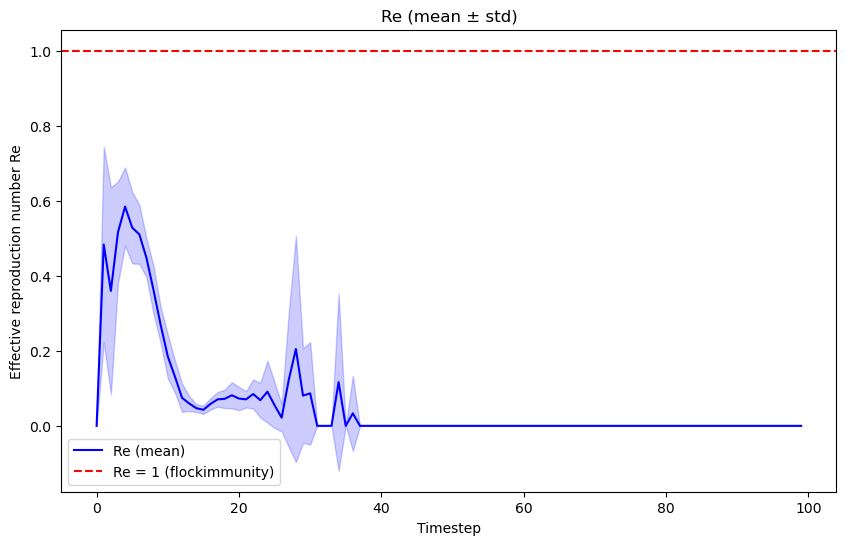

In [31]:
plt.figure(figsize=(10,6))
plt.plot(timesteps_range, Re_mean, color='blue', label='Re (mean)')
plt.fill_between(timesteps_range, Re_mean - Re_std, Re_mean + Re_std, color='blue', alpha=0.2)
plt.axhline(1, color='red', linestyle='--', label='Re = 1 (flockimmunity)')

plt.xlabel("Timestep")
plt.ylabel("Effective reproduction number Re")
plt.title(f"Re (mean ± std)")
plt.legend()
plt.show()


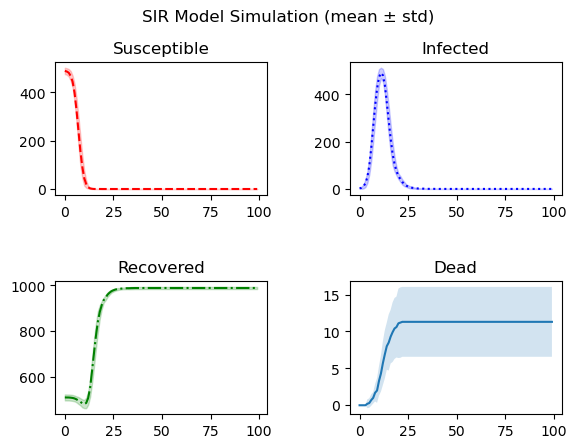

In [32]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(S_mean,'r--', label = "Susceptible")
axs[0, 0].fill_between(timesteps_range, S_mean - S_std, S_mean + S_std, color = 'r', alpha=0.2)
axs[0, 0].set_title('Susceptible')

axs[0, 1].plot(I_mean,'b:', label = "Infected")
axs[0, 1].fill_between(timesteps_range, I_mean - I_std, I_mean + I_std, color ='b', alpha=0.2)
axs[0, 1].set_title('Infected')

axs[1, 0].plot(R_mean,'g-.', label = "Recovered")
axs[1, 0].fill_between(timesteps_range, R_mean - R_std, R_mean + R_std, color ='g', alpha=0.2)
axs[1, 0].set_title('Recovered')

axs[1, 1].plot(D_mean, label = "Dead")
axs[1, 1].fill_between(timesteps_range, D_mean - D_std, D_mean + D_std, alpha=0.2)
axs[1, 1].set_title('Dead')

plt.tight_layout(pad = 3.0)
fig.suptitle("SIR Model Simulation (mean ± std)")
plt.show()



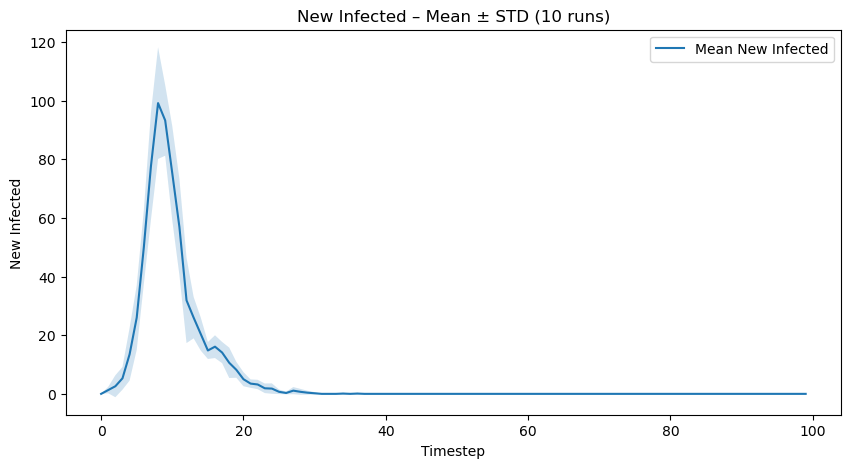

In [33]:
plt.figure(figsize=(10,5))
plt.plot(mean_new, label="Mean New Infected")
plt.fill_between(range(timesteps), mean_new - std_new, mean_new + std_new, alpha=0.2)
plt.xlabel("Timestep")
plt.ylabel("New Infected")
plt.title("New Infected – Mean ± STD (10 runs)")
plt.legend()
plt.show()

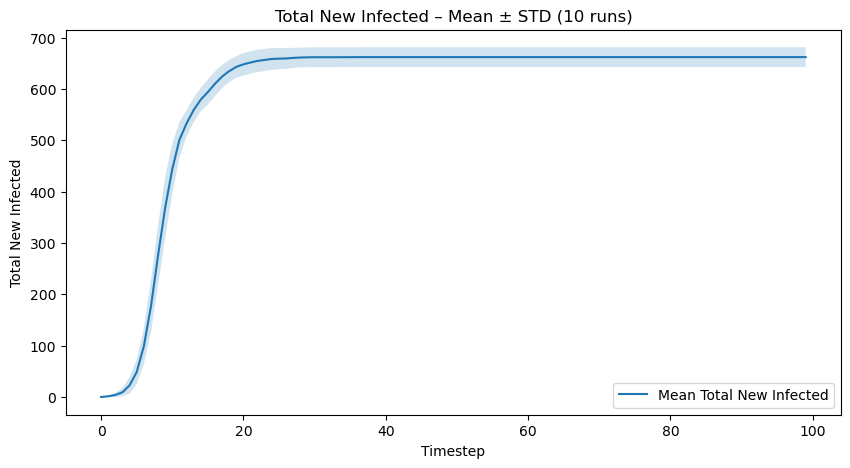

In [34]:
# --- Plot Total New Infected ---
plt.figure(figsize=(10,5))
plt.plot(mean_total, label="Mean Total New Infected")
plt.fill_between(range(timesteps), mean_total - std_total, mean_total + std_total, alpha=0.2)
plt.xlabel("Timestep")
plt.ylabel("Total New Infected")
plt.title("Total New Infected – Mean ± STD (10 runs)")
plt.legend()
plt.show()

In [35]:
agent_df = model.datacollector.get_agent_vars_dataframe()

In [7]:
# Skapa dictionary: infector -> antal sekundära infektioner(hur många agenter som den personen har smittat)
secondary = {}
for event in model.infection_log: #går igenom alla smittningar
    inf = event["infector_id"]
    if inf is not None:
        secondary[inf] = secondary.get(inf, 0) + 1 #om man har smittat någon, läggs det till i dictionaryn

# Medelvärdet = Re
Re = sum(secondary.values()) / len(secondary) if secondary else 0 
print("Re =", Re)

# Tror detta kanske är mer sant?
print(model_df["Re"].mean())

Re = 1.917795767646641
0.15657343571207882


## Vaccination rate: 78.% (IDAHO)

In [9]:
#Ny simulering med 78% vaccinationsgrad

vaccination_rate_2 = 0.785

model_2 = Modell.SIRModel(N, width, height, initial_infected, vaccination_rate_2, mortality_rate)

#Kör simupleringen
for t in range(timesteps):
    model_2.step()

# Skriv ut resultat efter 1000 steg
print("S:", model_2.count_status("S"))
print("I:", model_2.count_status("I"))
print("R:", model_2.count_status("R"))
print("D:", model_2.count_status("D"))


S: 3355
I: 2615
R: 93604
D: 426


In [10]:
model_df_2 = model_2.datacollector.get_model_vars_dataframe()
agent_df_2 = model_2.datacollector.get_agent_vars_dataframe()

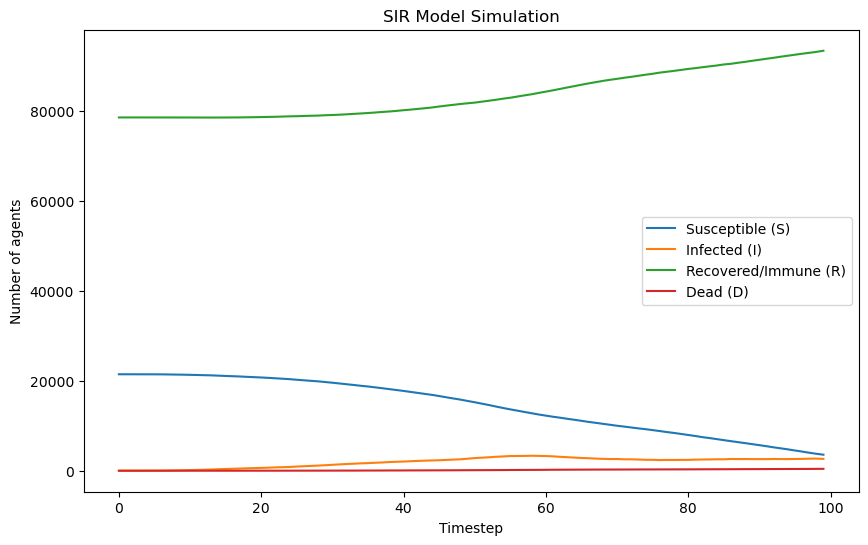

In [11]:
#SIRD-graf som plottar alla tillstånd i en graf

plt.figure(figsize=(10,6))
plt.plot(model_df_2["Susceptible"], label="Susceptible (S)")
plt.plot(model_df_2["Infected"], label="Infected (I)")
plt.plot(model_df_2["Resistant"], label="Recovered/Immune (R)")
plt.plot(model_df_2["Dead"], label="Dead (D)")
plt.xlabel("Timestep")
plt.ylabel("Number of agents")
plt.title("SIR Model Simulation")
plt.legend()
plt.show()

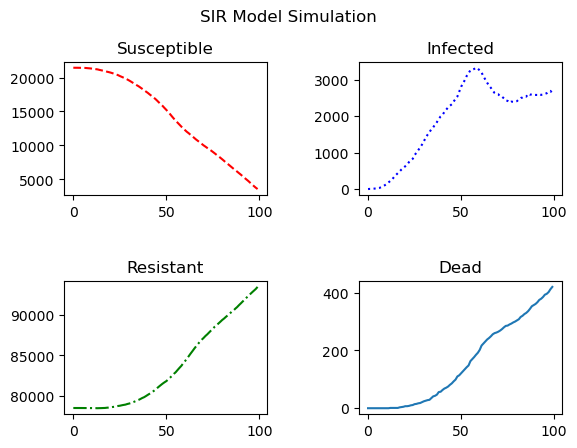

In [12]:
#Sublots, en för varje S, I, R, D.

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(model_df_2["Susceptible"],'r--', label = "Susceptible")
axs[0, 0].set_title('Susceptible')
axs[0, 1].plot(model_df_2["Infected"],'b:', label = "Infected")
axs[0, 1].set_title('Infected')
axs[1, 0].plot(model_df_2["Resistant"],'g-.', label = "Resistant")
axs[1, 0].set_title('Resistant')
axs[1, 1].plot(model_df_2["Dead"], label = "Dead")
axs[1, 1].set_title('Dead')
plt.tight_layout(pad = 3.0)
fig.suptitle("SIR Model Simulation")
plt.show()

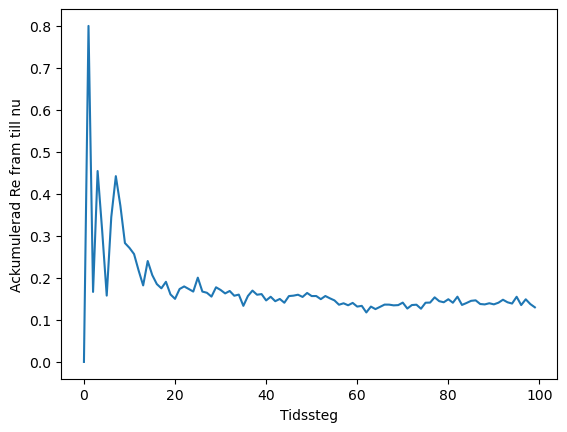

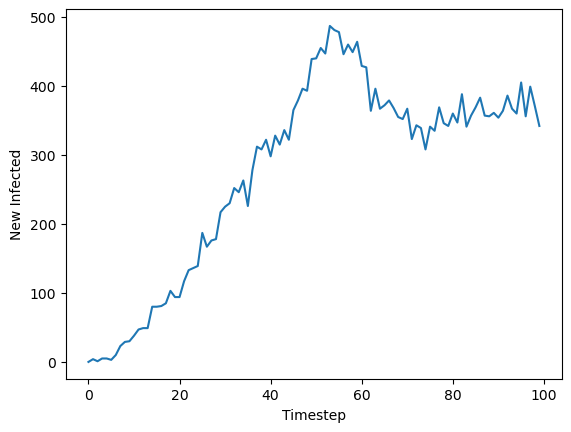

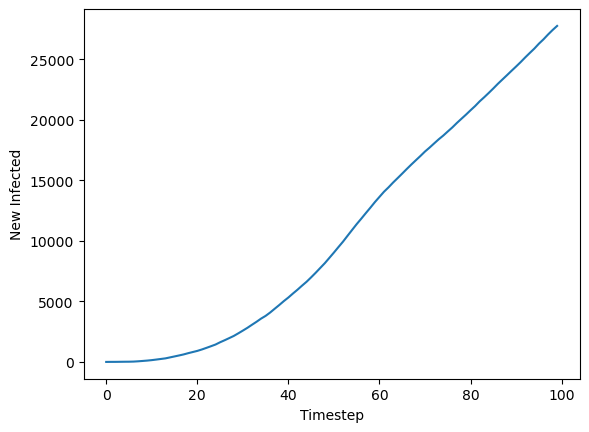

In [13]:
plt.plot(model_df_2["Re"])
plt.xlabel("Tidssteg")
plt.ylabel("Ackumulerad Re fram till nu")
plt.show()

plt.plot(model_df_2["New Infected"])
plt.xlabel("Timestep")
plt.ylabel("New Infected")
plt.show()

plt.plot(model_df_2["Total New Infected"])
plt.xlabel("Timestep")
plt.ylabel("New Infected")
plt.show()

## Vaccination rate: 95 % (önskad vaccinationstäckning)

In [14]:
#Ny simulering med 95% vaccinationsgrad

vaccination_rate_3 = 0.95

model_3 = Modell.SIRModel(N, width, height, initial_infected, vaccination_rate_3, mortality_rate)

for t in range(timesteps):
    model_3.step()

# Skriv ut resultat efter 1000 steg
print("S:", model_3.count_status("S"))
print("I:", model_3.count_status("I"))
print("R:", model_3.count_status("R"))
print("D:", model_3.count_status("D"))


S: 4902
I: 0
R: 95098
D: 0


In [15]:
model_df_3 = model_3.datacollector.get_model_vars_dataframe()
agent_df_3 = model_3.datacollector.get_agent_vars_dataframe()

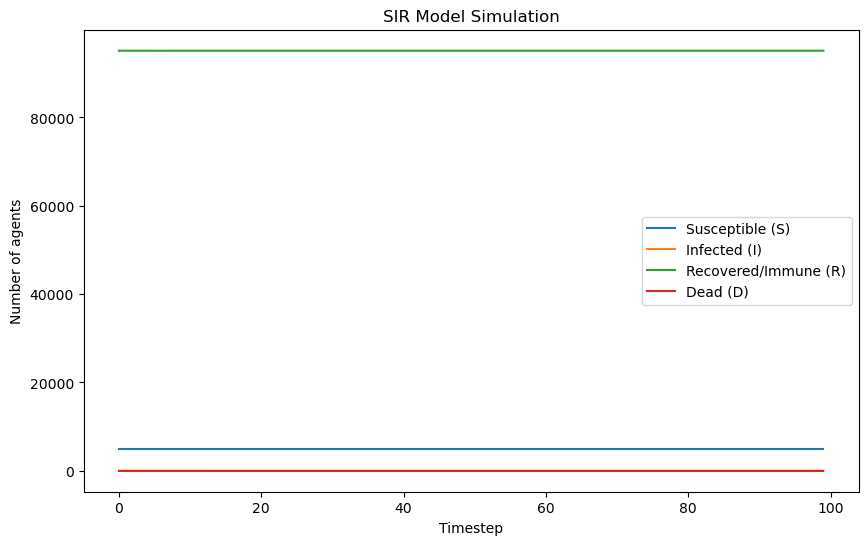

In [16]:
#Plottar SIRD-graf. Alla tillstånd i samma graf.
plt.figure(figsize=(10,6))
plt.plot(model_df_3["Susceptible"], label="Susceptible (S)")
plt.plot(model_df_3["Infected"], label="Infected (I)")
plt.plot(model_df_3["Resistant"], label="Recovered/Immune (R)")
plt.plot(model_df_3["Dead"], label="Dead (D)")
plt.xlabel("Timestep")
plt.ylabel("Number of agents")
plt.title("SIR Model Simulation")
plt.legend()
plt.show()

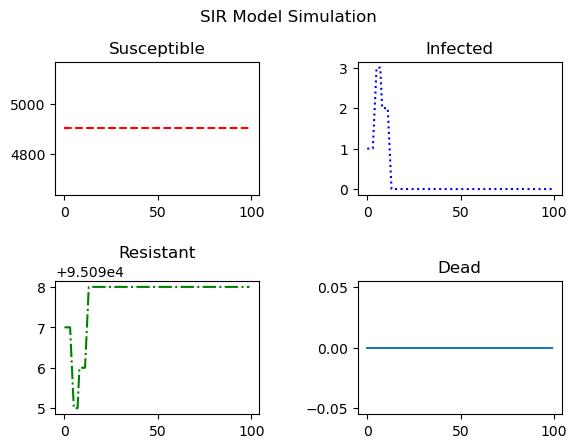

In [17]:
#Subplots. En för varje tillstånd S, I, R, D.

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(model_df_3["Susceptible"],'r--', label = "Susceptible")
axs[0, 0].set_title('Susceptible')
axs[0, 1].plot(model_df_3["Infected"],'b:', label = "Infected")
axs[0, 1].set_title('Infected')
axs[1, 0].plot(model_df_3["Resistant"],'g-.', label = "Resistant")
axs[1, 0].set_title('Resistant')
axs[1, 1].plot(model_df_3["Dead"], label = "Dead")
axs[1, 1].set_title('Dead')
plt.tight_layout(pad = 3.0)
fig.suptitle("SIR Model Simulation")
plt.show()

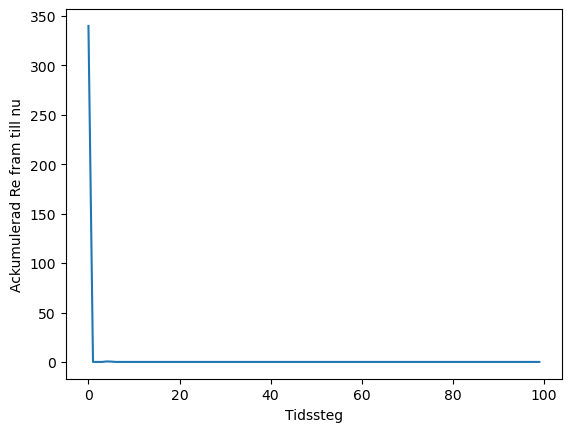

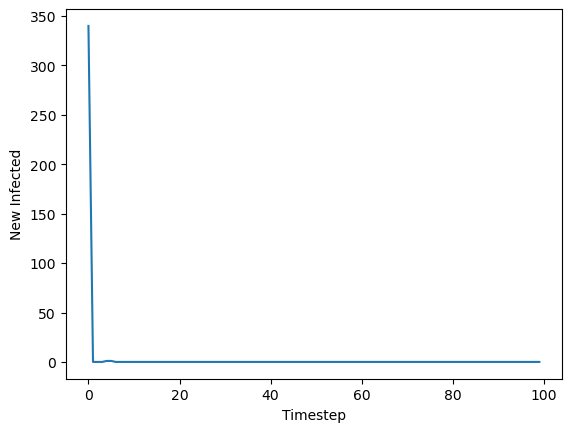

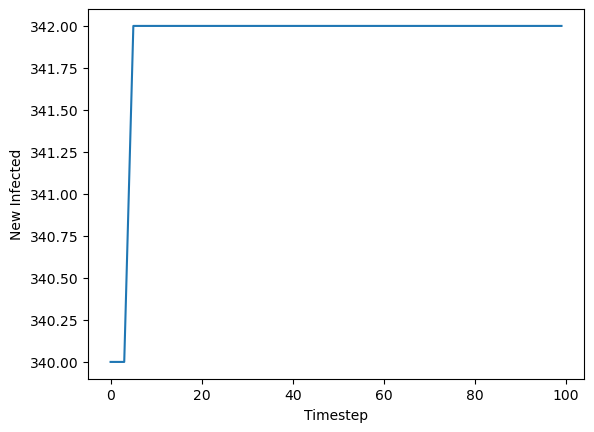

In [18]:
plt.plot(model_df_3["Re"])
plt.xlabel("Tidssteg")
plt.ylabel("Ackumulerad Re fram till nu")
plt.show()

plt.plot(model_df_3["New Infected"])
plt.xlabel("Timestep")
plt.ylabel("New Infected")
plt.show()

plt.plot(model_df_3["Total New Infected"])
plt.xlabel("Timestep")
plt.ylabel("New Infected")
plt.show()